In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg 
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/AIRGAS/Superstore2.csv")

In [ ]:
df.head

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
cols=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Row ID : [   1    2    3 ... 9992 9993 9994]
Order ID : ['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
Order Date : ['11/8/2016' '6/12/2016' '10/11/2015' ... '6/3/2016' '4/12/2015'
 '1/21/2014']
Ship Date : ['11/11/2016' '6/16/2016' '10/18/2015' ... '5/23/2015' '1/23/2014'
 '3/3/2017']
Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer ID : ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-190

In [ ]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

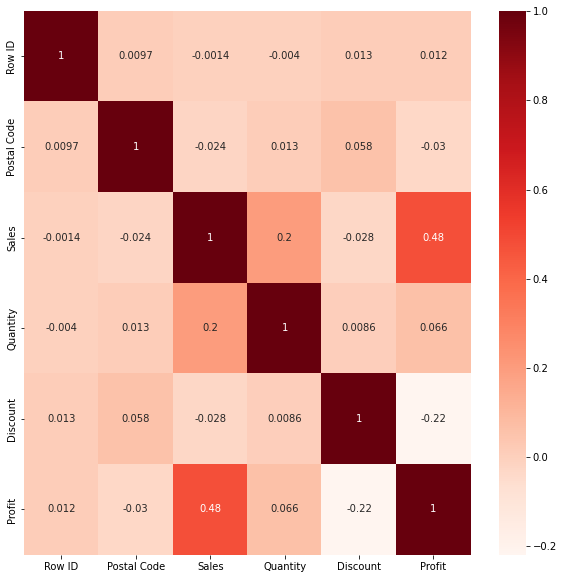

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Reds')

Text(0, 0.5, 'Product ID')

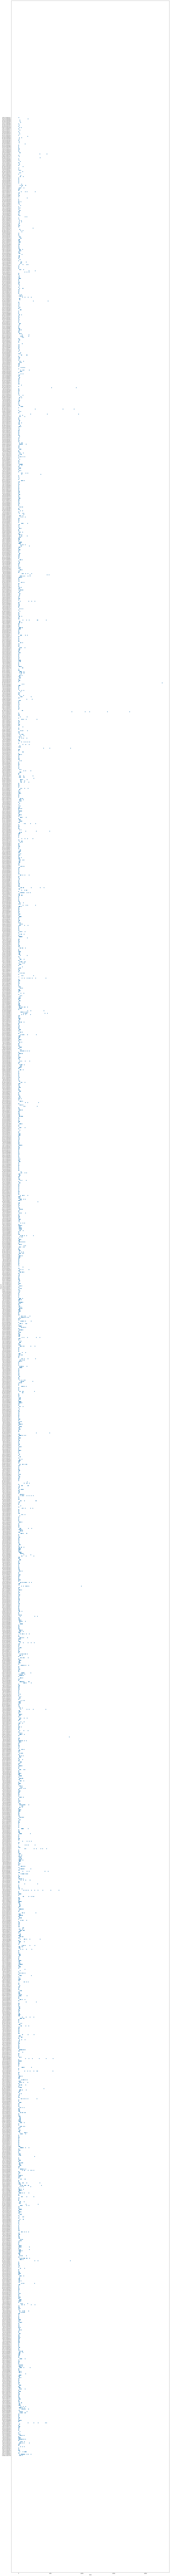

In [ ]:
plt.figure(figsize=(30,500))
plt.scatter(x='Sales',y='Product ID',data=df)
plt.xlabel('Sales')
plt.ylabel('Product ID')

Text(0, 0.5, 'Category')

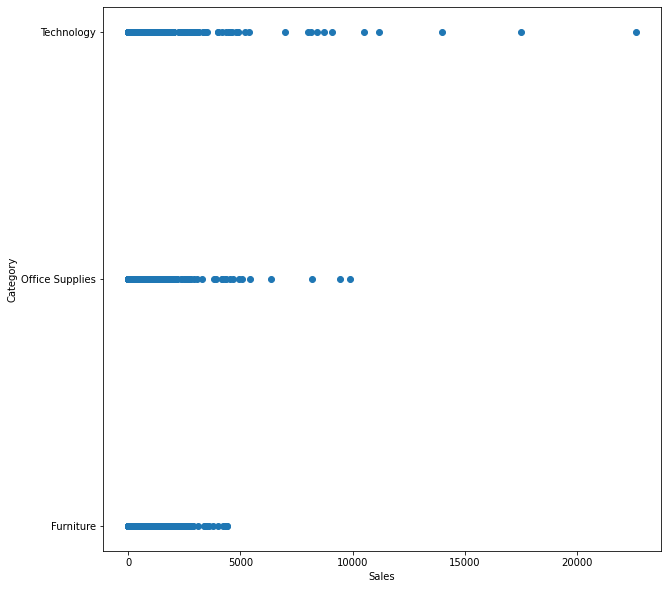

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='Sales',y='Category',data=df)
plt.xlabel('Sales')
plt.ylabel('Category')

Text(0, 0.5, 'Category')

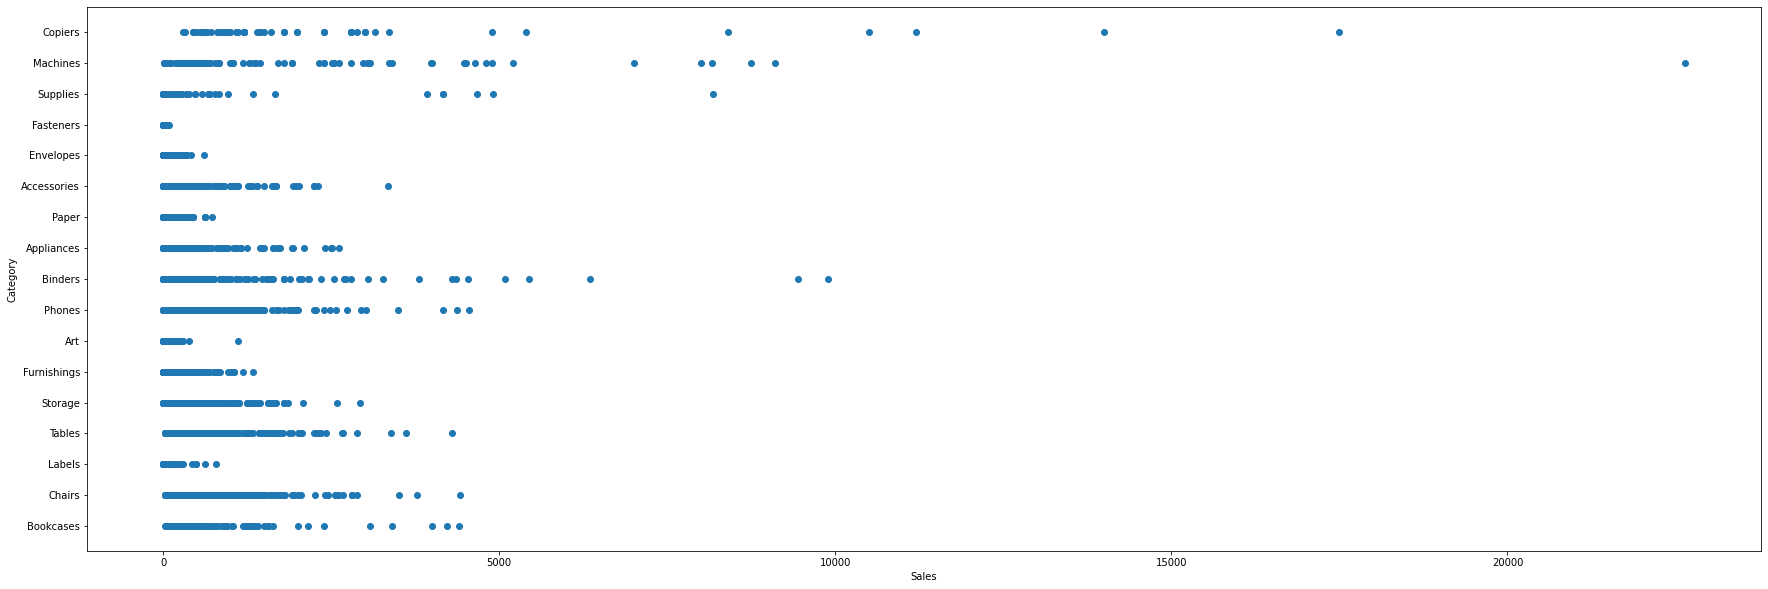

In [ ]:
plt.figure(figsize=(30,10))
plt.scatter(x='Sales',y='Sub-Category',data=df)
plt.xlabel('Sales')
plt.ylabel('Category')

In [ ]:
plt.figure(figsize=(40,500))
plt.scatter(x='Sales',y='Product Name',data=df)
plt.xlabel('Sales')
plt.ylabel('Product Name')

Text(0, 0.5, 'Product Name')

In [ ]:
print(df.loc[df['Sales'] > 20000])

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2697    2698  CA-2014-145317  3/18/2014  3/23/2014  Standard Class   

     Customer ID Customer Name      Segment        Country          City  ...  \
2697    SM-20320   Sean Miller  Home Office  United States  Jacksonville  ...   

     Postal Code  Region       Product ID    Category Sub-Category  \
2697       32216   South  TEC-MA-10002412  Technology     Machines   

                                           Product Name     Sales  Quantity  \
2697  Cisco TelePresence System EX90 Videoconferenci...  22638.48         6   

      Discount     Profit  
2697       0.5 -1811.0784  

[1 rows x 21 columns]


In [ ]:
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ... Postal Code  Region       Product ID         Category Sub-Category  \
0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
...   ...         ...     ...              ...              ...          ...   
9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales  Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600         2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                        Eldon Fold 'N Roll Cart System   22.3680         2   
...                                                 ...       ...       ...   
9989                             Ultra Door Pull Handle   25.2480         3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
9991                              Aastra 57i VoIP phone  258.5760         2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20 

In [ ]:
d3

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8074    8075  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
848      849  CA-2017-107503   1/1/2017   1/6/2017  Standard Class   
8075    8076  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8073    8074  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8071    8072  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
...      ...             ...        ...        ...             ...   
7875    7876  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   
5441    5442  CA-2017-155929   9/9/2017  9/13/2017  Standard Class   
6255    6256  CA-2017-139444   9/9/2017  9/15/2017  Standard Class   
8753    8754  CA-2017-152198   9/9/2017  9/10/2017     First Class   
7876    7877  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   

     Customer ID    Customer Name    Segment        Country        City  ...  \
8074    JM-15250     Janet Martin   Consumer  United States  Huntsville  ...   
848     GA-14725    Guy Armstrong   Consumer  United States      Lorain  ...   
8075    JM-15250     Janet Martin   Consumer  United States  Huntsville  ...   
8073    JM-15250     Janet Martin   Consumer  United States  Huntsville  ...   
8071    JM-15250     Janet Martin   Consumer  United States  Huntsville  ...   
...          ...              ...        ...            ...         ...  ...   
7875    DK-12835  Damala Kotsonis  Corporate  United States    Portland  ...   
5441    AI-10855   Arianne Irving   Consumer  United States    Glendale  ...   
6255    GK-14620      Grace Kelly  Corporate  United States       Plano  ...   
8753    JD-16015      Joy Daniels   Consumer  United States      Toledo  ...   
7876    DK-12835  Damala Kotsonis  Corporate  United States    Portland  ...   

     Postal Code   Region       Product ID         Category Sub-Category  \
8074       77340  Central  OFF-BI-10000343  Office Supplies      Binders   
848        44052     East  FUR-FU-10003878        Furniture  Furnishings   
8075       77340  Central  OFF-AP-10004708  Office Supplies   Appliances   
8073       77340  Central  OFF-BI-10000301  Office Supplies      Binders   
8071       77340  Central  FUR-CH-10003199        Furniture       Chairs   
...          ...      ...              ...              ...          ...   
7875       97206     West  OFF-PA-10002036  Office Supplies        Paper   
5441       85301     West  OFF-PA-10000859  Office Supplies        Paper   
6255       75023  Central  OFF-LA-10000134  Office Supplies       Labels   
8753       43615     East  OFF-LA-10000443  Office Supplies       Labels   
7876       97206     West  OFF-AP-10003278  Office Supplies   Appliances   

                                           Product Name    Sales  Quantity  \
8074  Pressboard Covers with Storage Hooks, 9 1/2" x...   13.748        14   
848                  Linden 10" Round Wall Clock, Black   48.896         4   
8075  Fellowes Superior 10 Outlet Split Surge Protector   15.224         2   
8073                             GBC Instant Report Kit    6.470         5   
8071       Office Star - Contemporary Task Swivel Chair  310.744         4   
...                                                 ...      ...       ...   
7875                                         Xerox 1930   31.104         6   
5441                                Unpadded Memo Slips    6.368         2   
6255                                          Avery 511    9.856         4   
8753                                          Avery 501   17.712         6   
7876            Belkin 7-Outlet SurgeMaster Home Series   11.176         1   

      Discount   Profit  
8074       0.8 -22.6842  
848        0.2   8.5568  
8075       0.8 -38.8212  
8073       0.8  -9.7050  
8071       0.3 -26.6352  
...        ...      ...  
7875       0.2  11.2752  
5441       0.2   2.3880  
6255       0.2   3.4496  
8753       0.2   5.9778  
7876       0.2   0.8382  

[9994 rows x 21 columns]

In [ ]:
d3.head()

Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
8074    8075  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
848      849  CA-2017-107503   1/1/2017  1/6/2017  Standard Class    GA-14725   
8075    8076  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
8073    8074  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
8071    8072  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   

      Customer Name   Segment        Country        City  ... Postal Code  \
8074   Janet Martin  Consumer  United States  Huntsville  ...       77340   
848   Guy Armstrong  Consumer  United States      Lorain  ...       44052   
8075   Janet Martin  Consumer  United States  Huntsville  ...       77340   
8073   Janet Martin  Consumer  United States  Huntsville  ...       77340   
8071   Janet Martin  Consumer  United States  Huntsville  ...       77340   

       Region       Product ID         Category Sub-Category  \
8074  Central  OFF-BI-10000343  Office Supplies      Binders   
848      East  FUR-FU-10003878        Furniture  Furnishings   
8075  Central  OFF-AP-10004708  Office Supplies   Appliances   
8073  Central  OFF-BI-10000301  Office Supplies      Binders   
8071  Central  FUR-CH-10003199        Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
8074  Pressboard Covers with Storage Hooks, 9 1/2" x...   13.748        14   
848                  Linden 10" Round Wall Clock, Black   48.896         4   
8075  Fellowes Superior 10 Outlet Split Surge Protector   15.224         2   
8073                             GBC Instant Report Kit    6.470         5   
8071       Office Star - Contemporary Task Swivel Chair  310.744         4   

      Discount   Profit  
8074       0.8 -22.6842  
848        0.2   8.5568  
8075       0.8 -38.8212  
8073       0.8  -9.7050  
8071       0.3 -26.6352  

[5 rows x 21 columns]

In [ ]:
d3.tail()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7875    7876  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   
5441    5442  CA-2017-155929   9/9/2017  9/13/2017  Standard Class   
6255    6256  CA-2017-139444   9/9/2017  9/15/2017  Standard Class   
8753    8754  CA-2017-152198   9/9/2017  9/10/2017     First Class   
7876    7877  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   

     Customer ID    Customer Name    Segment        Country      City  ...  \
7875    DK-12835  Damala Kotsonis  Corporate  United States  Portland  ...   
5441    AI-10855   Arianne Irving   Consumer  United States  Glendale  ...   
6255    GK-14620      Grace Kelly  Corporate  United States     Plano  ...   
8753    JD-16015      Joy Daniels   Consumer  United States    Toledo  ...   
7876    DK-12835  Damala Kotsonis  Corporate  United States  Portland  ...   

     Postal Code   Region       Product ID         Category Sub-Category  \
7875       97206     West  OFF-PA-10002036  Office Supplies        Paper   
5441       85301     West  OFF-PA-10000859  Office Supplies        Paper   
6255       75023  Central  OFF-LA-10000134  Office Supplies       Labels   
8753       43615     East  OFF-LA-10000443  Office Supplies       Labels   
7876       97206     West  OFF-AP-10003278  Office Supplies   Appliances   

                                 Product Name   Sales  Quantity  Discount  \
7875                               Xerox 1930  31.104         6       0.2   
5441                      Unpadded Memo Slips   6.368         2       0.2   
6255                                Avery 511   9.856         4       0.2   
8753                                Avery 501  17.712         6       0.2   
7876  Belkin 7-Outlet SurgeMaster Home Series  11.176         1       0.2   

       Profit  
7875  11.2752  
5441   2.3880  
6255   3.4496  
8753   5.9778  
7876   0.8382  

[5 rows x 21 columns]

In [ ]:
d3.head

<bound method NDFrame.head of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8074    8075  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
848      849  CA-2017-107503   1/1/2017   1/6/2017  Standard Class   
8075    8076  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8073    8074  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8071    8072  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
...      ...             ...        ...        ...             ...   
7875    7876  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   
5441    5442  CA-2017-155929   9/9/2017  9/13/2017  Standard Class   
6255    6256  CA-2017-139444   9/9/2017  9/15/2017  Standard Class   
8753    8754  CA-2017-152198   9/9/2017  9/10/2017     First Class   
7876    7877  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   

     Customer ID    Customer Name    Segment        Country        City  ...  \
8074    JM-15250     Janet Martin   Consumer  Uni

In [ ]:
d3.tail

<bound method NDFrame.tail of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
8074    8075  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
848      849  CA-2017-107503   1/1/2017   1/6/2017  Standard Class   
8075    8076  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8073    8074  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
8071    8072  CA-2017-151750   1/1/2017   1/5/2017  Standard Class   
...      ...             ...        ...        ...             ...   
7875    7876  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   
5441    5442  CA-2017-155929   9/9/2017  9/13/2017  Standard Class   
6255    6256  CA-2017-139444   9/9/2017  9/15/2017  Standard Class   
8753    8754  CA-2017-152198   9/9/2017  9/10/2017     First Class   
7876    7877  CA-2017-168403   9/9/2017  9/15/2017  Standard Class   

     Customer ID    Customer Name    Segment        Country        City  ...  \
8074    JM-15250     Janet Martin   Consumer  Uni

In [ ]:
# checking datatype
print(type(data.AdmissionDate[0]))
 
# convert to date
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])
 
# verify datatype
print(type(data.AdmissionDate[0]))

In [ ]:
print(type(df.Order_Date[0]))

<class 'str'>


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [ ]:
print(type(df.Order_Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.columns = df.columns.str.replace(' ','_')

In [ ]:
d3 = df.sort_values("Order_Date")

In [ ]:
d3

Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
7980    7981  CA-2014-103800 2014-01-03   1/7/2014  Standard Class   
739      740  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
740      741  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
741      742  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
1759    1760  CA-2014-141817 2014-01-05  1/12/2014  Standard Class   
...      ...             ...        ...        ...             ...   
5091    5092  CA-2017-156720 2017-12-30   1/3/2018  Standard Class   
908      909  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
907      908  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
1296    1297  CA-2017-115427 2017-12-30   1/3/2018  Standard Class   
906      907  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   

     Customer_ID      Customer_Name      Segment        Country  \
7980    DP-13000      Darren Powers     Consumer  United States   
739     PO-19195      Phillina Ober  Home Office  United States   
740     PO-19195      Phillina Ober  Home Office  United States   
741     PO-19195      Phillina Ober  Home Office  United States   
1759    MB-18085         Mick Brown     Consumer  United States   
...          ...                ...          ...            ...   
5091    JM-15580      Jill Matthias     Consumer  United States   
908     PO-18865  Patrick O'Donnell     Consumer  United States   
907     PO-18865  Patrick O'Donnell     Consumer  United States   
1296    EB-13975         Erica Bern    Corporate  United States   
906     PO-18865  Patrick O'Donnell     Consumer  United States   

               City  ... Postal_Code   Region       Product_ID  \
7980        Houston  ...       77095  Central  OFF-PA-10000174   
739      Naperville  ...       60540  Central  OFF-LA-10003223   
740      Naperville  ...       60540  Central  OFF-ST-10002743   
741      Naperville  ...       60540  Central  OFF-BI-10004094   
1759   Philadelphia  ...       19143     East  OFF-AR-10003478   
...             ...  ...         ...      ...              ...   
5091       Loveland  ...       80538     West  OFF-FA-10003472   
908   New York City  ...       10009     East  OFF-BI-10003684   
907   New York City  ...       10009     East  TEC-PH-10004774   
1296      Fairfield  ...       94533     West  OFF-BI-10002103   
906   New York City  ...       10009     East  FUR-BO-10003441   

             Category Sub-Category  \
7980  Office Supplies        Paper   
739   Office Supplies       Labels   
740   Office Supplies      Storage   
741   Office Supplies      Binders   
1759  Office Supplies          Art   
...               ...          ...   
5091  Office Supplies    Fasteners   
908   Office Supplies      Binders   
907        Technology       Phones   
1296  Office Supplies      Binders   
906         Furniture    Bookcases   

                                           Product_Name    Sales  Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448         2   
739                                           Avery 508   11.784         3   
740                       SAFCO Boltless Steel Shelving  272.736         3   
741          GBC Standard Plastic Binding Systems Combs    3.540         2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536         3   
...                                                 ...      ...       ...   
5091                                Bagged Rubber Bands    3.024         3   
908                Wilson Jones Legal Size Ring Binders   52.776         3   
907                           Gear Head AU3700S Headset   90.930         7   
1296    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904         2   
906   Bush Westfield Collection Bookcases, Fully Ass...  323.136         4   

      Discount   Profit  
7980       0.2   5.5512  
739        0.2   4.2717  
740        0.2 -64.7748  
741        0.8  -5.4870  
1759       0.2   4.8840  
...        ...   

In [ ]:
train

Row_ID        Order_ID Order_Date   Ship_Date       Ship_Mode  \
7933    7934  CA-2017-166093 2017-08-17   8/24/2017  Standard Class   
8657    8658  CA-2014-142769 2014-09-13   9/13/2014        Same Day   
9599    9600  CA-2015-116841 2015-04-14   4/18/2015  Standard Class   
799      800  CA-2015-101910 2015-11-27   12/3/2015  Standard Class   
3813    3814  CA-2015-103961 2015-11-05   11/9/2015  Standard Class   
...      ...             ...        ...         ...             ...   
8656    8657  CA-2014-142769 2014-09-13   9/13/2014        Same Day   
204      205  CA-2017-126382 2017-06-03    6/7/2017  Standard Class   
7584    7585  CA-2014-163223 2014-03-21   3/25/2014  Standard Class   
5362    5363  CA-2016-122017 2016-12-29    1/2/2017  Standard Class   
7905    7906  US-2015-118766 2015-10-15  10/22/2015  Standard Class   

     Customer_ID     Customer_Name      Segment        Country           City  \
7933    RW-19540       Rick Wilson    Corporate  United States      Brentwood   
8657    RP-19390      Resi Pölking     Consumer  United States        Seattle   
9599    TP-21130  Theone Pippenger     Consumer  United States    Springfield   
799     CD-11920       Carlos Daly     Consumer  United States  Lake Elsinore   
3813    NG-18430     Nathan Gelder     Consumer  United States         Quincy   
...          ...               ...          ...            ...            ...   
8656    RP-19390      Resi Pölking     Consumer  United States        Seattle   
204     HK-14890  Heather Kirkland    Corporate  United States       Franklin   
7584    KH-16690  Kristen Hastings    Corporate  United States    Springfield   
5362    CD-11920       Carlos Daly     Consumer  United States        Wichita   
7905    LS-16975  Lindsay Shagiari  Home Office  United States         Dallas   

      ... Postal_Code   Region       Product_ID         Category Sub-Category  \
7933  ...       94513     West  OFF-EN-10003134  Office Supplies    Envelopes   
8657  ...       98103     West  OFF-AP-10004785  Office Supplies   Appliances   
9599  ...       97477     West  OFF-AP-10002403  Office Supplies   Appliances   
799   ...       92530     West  FUR-CH-10002647        Furniture       Chairs   
3813  ...       62301  Central  OFF-LA-10004484  Office Supplies       Labels   
...   ...         ...      ...              ...              ...          ...   
8656  ...       98103     West  OFF-PA-10002923  Office Supplies        Paper   
204   ...       37064    South  FUR-FU-10002960        Furniture  Furnishings   
7584  ...       22153    South  OFF-LA-10004409  Office Supplies       Labels   
5362  ...       67212  Central  FUR-FU-10000672        Furniture  Furnishings   
7905  ...       75217  Central  OFF-EN-10001415  Office Supplies    Envelopes   

                                           Product_Name    Sales  Quantity  \
7933                                    Staple envelope   23.360         2   
8657  Holmes Replacement Filter for HEPA Air Cleaner...   22.660         2   
9599  Acco Smartsocket Color-Coded Six-Outlet AC Ada...   35.208         1   
799          Situations Contoured Folding Chairs, 4/Set  283.920         5   
3813                                          Avery 476   19.824         6   
...                                                 ...      ...       ...   
8656                                         Xerox 1942   48.940         1   
204          Eldon 200 Class Desk Accessories, Burgundy   35.168         7   
7584                                          Avery 492   14.400         5   
5362     Executive Impressions 10" Spectator Wall Clock   70.560         6   
7905                                    Staple envelope    4.464         1   

      Discount   Profit  
7933       0.0  11.6800  
8657       0.0   9.7438  
9599       0.2   2.6406  
799        0.2  17.7450  
3813       0.2   6.4428  
...        ...      ...  
8656       0.0  24.4700  
204        0.2   9.6712  
7584       0.0   6.6240  
5362      

In [ ]:
def head_split(dataframe, percentage):
  return dataframe.head(int(len(dataframe)*percentage))

In [ ]:
def tail_split(dataframe, percentage):
  return dataframe.tail(int(len(dataframe)*percentage))

In [ ]:
train = head_split(d3,.6)

In [ ]:
train

Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
7980    7981  CA-2014-103800 2014-01-03   1/7/2014  Standard Class   
739      740  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
740      741  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
741      742  CA-2014-112326 2014-01-04   1/8/2014  Standard Class   
1759    1760  CA-2014-141817 2014-01-05  1/12/2014  Standard Class   
...      ...             ...        ...        ...             ...   
6308    6309  CA-2016-163328 2016-11-04  11/6/2016    Second Class   
664      665  CA-2016-143308 2016-11-04  11/4/2016        Same Day   
702      703  CA-2016-163755 2016-11-04  11/8/2016    Second Class   
6309    6310  CA-2016-163328 2016-11-04  11/6/2016    Second Class   
6310    6311  CA-2016-163328 2016-11-04  11/6/2016    Second Class   

     Customer_ID     Customer_Name      Segment        Country          City  \
7980    DP-13000     Darren Powers     Consumer  United States       Houston   
739     PO-19195     Phillina Ober  Home Office  United States    Naperville   
740     PO-19195     Phillina Ober  Home Office  United States    Naperville   
741     PO-19195     Phillina Ober  Home Office  United States    Naperville   
1759    MB-18085        Mick Brown     Consumer  United States  Philadelphia   
...          ...               ...          ...            ...           ...   
6308    TP-21565      Tracy Poddar    Corporate  United States        Eugene   
664     RC-19825       Roy Collins     Consumer  United States    Louisville   
702     AS-10285  Alejandro Savely    Corporate  United States       Seattle   
6309    TP-21565      Tracy Poddar    Corporate  United States        Eugene   
6310    TP-21565      Tracy Poddar    Corporate  United States        Eugene   

      ... Postal_Code   Region       Product_ID         Category Sub-Category  \
7980  ...       77095  Central  OFF-PA-10000174  Office Supplies        Paper   
739   ...       60540  Central  OFF-LA-10003223  Office Supplies       Labels   
740   ...       60540  Central  OFF-ST-10002743  Office Supplies      Storage   
741   ...       60540  Central  OFF-BI-10004094  Office Supplies      Binders   
1759  ...       19143     East  OFF-AR-10003478  Office Supplies          Art   
...   ...         ...      ...              ...              ...          ...   
6308  ...       97405     West  FUR-CH-10000229        Furniture       Chairs   
664   ...       40214    South  OFF-FA-10000621  Office Supplies    Fasteners   
702   ...       98103     West  FUR-FU-10003394        Furniture  Furnishings   
6309  ...       97405     West  OFF-LA-10003930  Office Supplies       Labels   
6310  ...       97405     West  OFF-PA-10000176  Office Supplies        Paper   

                                           Product_Name    Sales  Quantity  \
7980  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448         2   
739                                           Avery 508   11.784         3   
740                       SAFCO Boltless Steel Shelving  272.736         3   
741          GBC Standard Plastic Binding Systems Combs    3.540         2   
1759  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536         3   
...                                                 ...      ...       ...   
6308  Global Enterprise Series Seating High-Back Swi...  650.352         3   
664            OIC Colored Binder Clips, Assorted Sizes   10.740         3   
702              Tenex "The Solids" Textured Chair Mats  209.880         3   
6309  Dot Matrix Printer Tape Reel Labels, White, 50...  629.184         8   
6310                                         Xerox 1887   15.176         1   

      Discount    Profit  
7980       0.2    5.5512  
739        0.2    4.2717  
740        0.2  -64.7748  
741        0.8   -5.4870  
1759       0.2    4.8840  
...        ...       ...  
6308       0.2  -97.5528  
664        0.0    5.2626  
702        0.0   35.6796  
6309       0.2  228.0792

In [ ]:
valTest = tail_split(d3, .4)

In [ ]:
valTest

Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
6772    6773  CA-2016-119018 2016-11-04  11/8/2016  Standard Class   
6728    6729  CA-2016-165827 2016-11-04  11/9/2016  Standard Class   
9322    9323  US-2016-111563 2016-11-04  11/8/2016  Standard Class   
9321    9322  US-2016-111563 2016-11-04  11/8/2016  Standard Class   
6134    6135  CA-2016-146766 2016-11-04  11/4/2016        Same Day   
...      ...             ...        ...        ...             ...   
5091    5092  CA-2017-156720 2017-12-30   1/3/2018  Standard Class   
908      909  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
907      908  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
1296    1297  CA-2017-115427 2017-12-30   1/3/2018  Standard Class   
906      907  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   

     Customer_ID      Customer_Name      Segment        Country  \
6772    CW-11905         Carl Weiss  Home Office  United States   
6728    MF-17665   Maureen Fritzler    Corporate  United States   
9322    SM-20005     Sally Matthias     Consumer  United States   
9321    SM-20005     Sally Matthias     Consumer  United States   
6134    TT-21220    Thomas Thornton     Consumer  United States   
...          ...                ...          ...            ...   
5091    JM-15580      Jill Matthias     Consumer  United States   
908     PO-18865  Patrick O'Donnell     Consumer  United States   
907     PO-18865  Patrick O'Donnell     Consumer  United States   
1296    EB-13975         Erica Bern    Corporate  United States   
906     PO-18865  Patrick O'Donnell     Consumer  United States   

               City  ... Postal_Code   Region       Product_ID  \
6772    Los Angeles  ...       90004     West  OFF-BI-10003314   
6728          Miami  ...       33180    South  FUR-FU-10001889   
9322        Houston  ...       77041  Central  FUR-FU-10000723   
9321        Houston  ...       77041  Central  FUR-FU-10002445   
6134    Chula Vista  ...       91911     West  OFF-AR-10002135   
...             ...  ...         ...      ...              ...   
5091       Loveland  ...       80538     West  OFF-FA-10003472   
908   New York City  ...       10009     East  OFF-BI-10003684   
907   New York City  ...       10009     East  TEC-PH-10004774   
1296      Fairfield  ...       94533     West  OFF-BI-10002103   
906   New York City  ...       10009     East  FUR-BO-10003441   

             Category Sub-Category  \
6772  Office Supplies      Binders   
6728        Furniture  Furnishings   
9322        Furniture  Furnishings   
9321        Furniture  Furnishings   
6134  Office Supplies          Art   
...               ...          ...   
5091  Office Supplies    Fasteners   
908   Office Supplies      Binders   
907        Technology       Phones   
1296  Office Supplies      Binders   
906         Furniture    Bookcases   

                                           Product_Name    Sales  Quantity  \
6772             Tuff Stuff Recycled Round Ring Binders    7.712         2   
6728                             Ultra Door Pull Handle   50.496         6   
9322  Deflect-o EconoMat Studded, No Bevel Mat for L...   66.112         4   
9321  DAX Two-Tone Rosewood/Black Document Frame, De...   11.376         3   
6134  Boston Heavy-Duty Trimline Electric Pencil Sha...  192.800         4   
...                                                 ...      ...       ...   
5091                                Bagged Rubber Bands    3.024         3   
908                Wilson Jones Legal Size Ring Binders   52.776         3   
907                           Gear Head AU3700S Headset   90.930         7   
1296    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904         2   
906   Bush Westfield Collection Bookcases, Fully Ass...  323.136         4   

      Discount   Profit  
6772       0.2   2.7956  
6728       0.2   8.2056  
9322       0.6 -84.2928  
9321       0.6  -5.6880  
6134       0.0  55.9120  
...        ...   

In [ ]:
val = head_split(valTest, .5)

In [ ]:
val

Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
6772    6773  CA-2016-119018 2016-11-04  11/8/2016  Standard Class   
6728    6729  CA-2016-165827 2016-11-04  11/9/2016  Standard Class   
9322    9323  US-2016-111563 2016-11-04  11/8/2016  Standard Class   
9321    9322  US-2016-111563 2016-11-04  11/8/2016  Standard Class   
6134    6135  CA-2016-146766 2016-11-04  11/4/2016        Same Day   
...      ...             ...        ...        ...             ...   
2439    2440  CA-2017-139948 2017-07-17  7/22/2017  Standard Class   
5650    5651  CA-2017-142342 2017-07-17  7/19/2017    Second Class   
5651    5652  CA-2017-142342 2017-07-17  7/19/2017    Second Class   
4527    4528  US-2017-105046 2017-07-17  7/23/2017  Standard Class   
3917    3918  US-2017-142573 2017-07-18  7/23/2017  Standard Class   

     Customer_ID     Customer_Name      Segment        Country          City  \
6772    CW-11905        Carl Weiss  Home Office  United States   Los Angeles   
6728    MF-17665  Maureen Fritzler    Corporate  United States         Miami   
9322    SM-20005    Sally Matthias     Consumer  United States       Houston   
9321    SM-20005    Sally Matthias     Consumer  United States       Houston   
6134    TT-21220   Thomas Thornton     Consumer  United States   Chula Vista   
...          ...               ...          ...            ...           ...   
2439    SW-20455       Shaun Weien     Consumer  United States         Tampa   
5650    AJ-10795   Anthony Johnson    Corporate  United States  Apple Valley   
5651    AJ-10795   Anthony Johnson    Corporate  United States  Apple Valley   
4527    BE-11335       Bill Eplett  Home Office  United States          Rome   
3917    ML-17410      Maris LaWare     Consumer  United States       Phoenix   

      ... Postal_Code   Region       Product_ID         Category Sub-Category  \
6772  ...       90004     West  OFF-BI-10003314  Office Supplies      Binders   
6728  ...       33180    South  FUR-FU-10001889        Furniture  Furnishings   
9322  ...       77041  Central  FUR-FU-10000723        Furniture  Furnishings   
9321  ...       77041  Central  FUR-FU-10002445        Furniture  Furnishings   
6134  ...       91911     West  OFF-AR-10002135  Office Supplies          Art   
...   ...         ...      ...              ...              ...          ...   
2439  ...       33614    South  FUR-FU-10002597        Furniture  Furnishings   
5650  ...       92307     West  OFF-ST-10002957  Office Supplies      Storage   
5651  ...       92307     West  FUR-BO-10002613        Furniture    Bookcases   
4527  ...       13440     East  FUR-FU-10004848        Furniture  Furnishings   
3917  ...       85023     West  OFF-BI-10003350  Office Supplies      Binders   

                                           Product_Name     Sales  Quantity  \
6772             Tuff Stuff Recycled Round Ring Binders     7.712         2   
6728                             Ultra Door Pull Handle    50.496         6   
9322  Deflect-o EconoMat Studded, No Bevel Mat for L...    66.112         4   
9321  DAX Two-Tone Rosewood/Black Document Frame, De...    11.376         3   
6134  Boston Heavy-Duty Trimline Electric Pencil Sha...   192.800         4   
...                                                 ...       ...       ...   
2439  C-Line Magnetic Cubicle Keepers, Clear Polypro...     7.904         2   
5650             Sterilite Show Offs Storage Containers    10.560         2   
5651  Atlantic Metals Mobile 4-Shelf Bookcases, Cust...  1194.165         5   
4527                              DAX Solid Wood Frames    39.080         4   
3917                    Acco Expandable Hanging Binders     7.656         4   

      Discount    Profit  
6772      0.20    2.7956  
6728      0.20    8.2056  
9322      0.60  -84.2928  
9321      0.60   -5.6880  
6134      0.00   55.9120  
...        ...       ...  
2439      0.20    2.1736  
5650      0.00    0.0000  
5651      0.15  210.7350  
4527      0.

In [ ]:
test = tail_split(valTest, .5)

In [ ]:
test

Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
7044    7045  US-2017-165358 2017-07-18  7/23/2017  Standard Class   
3918    3919  US-2017-142573 2017-07-18  7/23/2017  Standard Class   
7043    7044  US-2017-165358 2017-07-18  7/23/2017  Standard Class   
3914    3915  US-2017-142573 2017-07-18  7/23/2017  Standard Class   
3915    3916  US-2017-142573 2017-07-18  7/23/2017  Standard Class   
...      ...             ...        ...        ...             ...   
5091    5092  CA-2017-156720 2017-12-30   1/3/2018  Standard Class   
908      909  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
907      908  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   
1296    1297  CA-2017-115427 2017-12-30   1/3/2018  Standard Class   
906      907  CA-2017-143259 2017-12-30   1/3/2018  Standard Class   

     Customer_ID      Customer_Name    Segment        Country           City  \
7044    SV-20365        Seth Vernon   Consumer  United States   Philadelphia   
3918    ML-17410       Maris LaWare   Consumer  United States        Phoenix   
7043    SV-20365        Seth Vernon   Consumer  United States   Philadelphia   
3914    ML-17410       Maris LaWare   Consumer  United States        Phoenix   
3915    ML-17410       Maris LaWare   Consumer  United States        Phoenix   
...          ...                ...        ...            ...            ...   
5091    JM-15580      Jill Matthias   Consumer  United States       Loveland   
908     PO-18865  Patrick O'Donnell   Consumer  United States  New York City   
907     PO-18865  Patrick O'Donnell   Consumer  United States  New York City   
1296    EB-13975         Erica Bern  Corporate  United States      Fairfield   
906     PO-18865  Patrick O'Donnell   Consumer  United States  New York City   

      ... Postal_Code  Region       Product_ID         Category Sub-Category  \
7044  ...       19134    East  OFF-SU-10004768  Office Supplies     Supplies   
3918  ...       85023    West  FUR-CH-10000513        Furniture       Chairs   
7043  ...       19134    East  FUR-CH-10002647        Furniture       Chairs   
3914  ...       85023    West  FUR-TA-10001932        Furniture       Tables   
3915  ...       85023    West  FUR-CH-10004218        Furniture       Chairs   
...   ...         ...     ...              ...              ...          ...   
5091  ...       80538    West  OFF-FA-10003472  Office Supplies    Fasteners   
908   ...       10009    East  OFF-BI-10003684  Office Supplies      Binders   
907   ...       10009    East  TEC-PH-10004774       Technology       Phones   
1296  ...       94533    West  OFF-BI-10002103  Office Supplies      Binders   
906   ...       10009    East  FUR-BO-10003441        Furniture    Bookcases   

                                           Product_Name    Sales  Quantity  \
7044                Acme Kleencut Forged Steel Scissors    9.184         2   
3918                  High-Back Leather Manager's Chair  311.976         3   
7043         Situations Contoured Folding Chairs, 4/Set  198.744         4   
3914  Chromcraft 48" x 96" Racetrack Double Pedestal...  801.600         5   
3915           Global Fabric Manager's Chair, Dark Gray  161.568         2   
...                                                 ...      ...       ...   
5091                                Bagged Rubber Bands    3.024         3   
908                Wilson Jones Legal Size Ring Binders   52.776         3   
907                           Gear Head AU3700S Headset   90.930         7   
1296    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904         2   
906   Bush Westfield Collection Bookcases, Fully Ass...  323.136         4   

      Discount    Profit  
7044       0.2    1.1480  
3918       0.2  -42.8967  
7043       0.3  -14.1960  
3914       0.5 -448.8960  
3915       0.2   10.0980  
...        ...       ...  
5091       0.2   -0.6048  
908        0.2   19.7910  
907        0.0    2.7279  
1296       0.2    4.5188  
906      